# Assignment 1

First we need to import a few modules, execute the cell below:

In [18]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [19]:
def f(x):
    return numpy.cos(x)
    '''Function equivalent to '''
    # YOUR CODE HERE


You can use the following cell to check that your code works for scalar arguments:

In [20]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [21]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [22]:
def df_analytic(x):
    return -numpy.sin(x)
    '''
    The analytic derivative
    '''
    # YOUR CODE HERE

In [23]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [24]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [26]:
def backward_difference(f, x, dx):
    return (f(x)-f(x-dx))/(dx)
    '''
    This function implements the backward difference method for the 
    first derivative of the function f at position x using interval
    dx.
    '''
    # YOUR CODE HERE

In [27]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


Text(0.5,1,'Comparison of the analytical derivative and the numerical implementation for different values of dx')

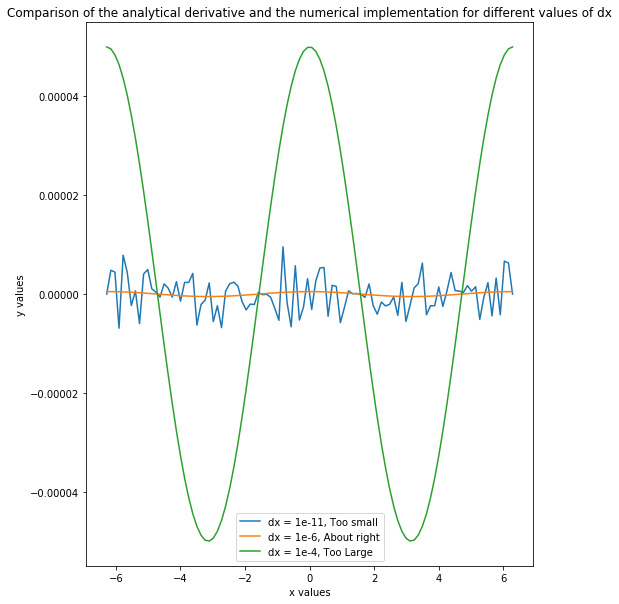

In [28]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = backward_difference(f, xs, dx=1e-11)
df_dx_2 = backward_difference(f, xs, dx=1e-6)
df_dx_3 = backward_difference(f, xs, dx=1e-4)
df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(8, 10))
too_small = plt.plot(xs, df_dx_1 - df_dx_analytical, label='dx = 1e-11, Too small')
just_right = plt.plot(xs, df_dx_2 - df_dx_analytical, label='dx = 1e-6, About right')
too_big=plt.plot(xs, df_dx_3 - df_dx_analytical, label='dx = 1e-4, Too Large')
plt.xlabel("x values")
plt.ylabel("y values")
plt.legend()
plt.title("Comparison of the analytical derivative and the numerical implementation for different values of dx")

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


When $\Delta x$ is too small the computer can reach a point where it will not be able to store a sufficient number of digits to have infinite accuracy. If these small numbers are compared to large numbers (e.g. numbers of the orders of $10^6$ - $10^{-5}$) then the computer may not be able to store much of the data relevant to the $10^{-5}$. If the $10^6$ is taken away from the stored number it may be that the accuracy has suffered dramatically from the original value. If $\Delta x$ is too large then the model will not be an accurate estimation of the function that was trying to be modelled. For example if you took the function $cos(X)$ starting at 0 with a $\Delta x$ of $2\pi$ then it would appear that $f(X)=1$ with none of the cyclic patterns that would be expected.